# GridWorld Example 3.8

In [14]:
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table

In [16]:
def move(state, action):
    """
    Return environment observation
    """
    
    # check if state is in A
    if state == (0, 1):
        
        # send to A'
        return (4, 1), 10
    
    # check if state is in B
    if state == (0, 3):
        
        # send to B'
        return (2, 3), 5
    
    # reward
    reward = 0
    
    # S' after a
    s_prime = (state[0] + action[0], state[1] + action[1])
    
    # row boundary
    row_boundary = (s_prime[0] < 0 or s_prime[0] > 4) 
        
    # column boundary
    column_boundary = (s_prime[1] < 0 or s_prime[1] > 4) 
    
    # check if out of bounds
    if row_boundary or column_boundary:
        
        # Remain in state
        s_prime = state
        
        # consequence
        reward = -1
    
    # S', R'
    return s_prime, reward

In [17]:
############################################
# Bellman Optimal step in Policy Iteration #
############################################
V = {}
    
# Create length and width to iterate grid
width = 5; length = width * width

# Set of equiprobable actions N, S, E, W or Up, Down, Right, Left
actions = [(-1, 0), (1, 0), (0, 1), (0, -1)]

# Policy actions 
policy = {}

# Create states for policy
for i in range(length):

    # Create row index
    row = i // width

    # Create column index
    column = i % width

    # Create policy
    policy[(row, column)] = actions
    
    # Initialize V (s), for all s 2 S, arbitrarily except that V (terminal)=0
    V[(row, column)] = 0

# Algorithm parameter: a small threshold ✓ > 0 determining accuracy of estimation
theta = delta = 0.01

# Loop: until delta < ✓
while delta >= theta:
    
    # delta <-- 0
    delta = 0
    
    # Loop for each state:
    for state, actions in policy.items():
        
        # v <-- V(s)
        v = V[state]
        
        # store the action values for state
        values = []
        
        # Test all actions
        for action in actions:
        
            # Get all next states and rewards
            s_prime, reward = move(state, action)

            # V(s) <-- [r + *V(s')] undiscounted and bootstrapping all next states
            values.append(reward + 0.9*V[s_prime]) 
        
        # V(s) = max q(s,a)
        V[state] = max(values)
            
        # delta <-- max(delta, |v - V(s)|)
        delta = max(delta, abs(v-V[state]))

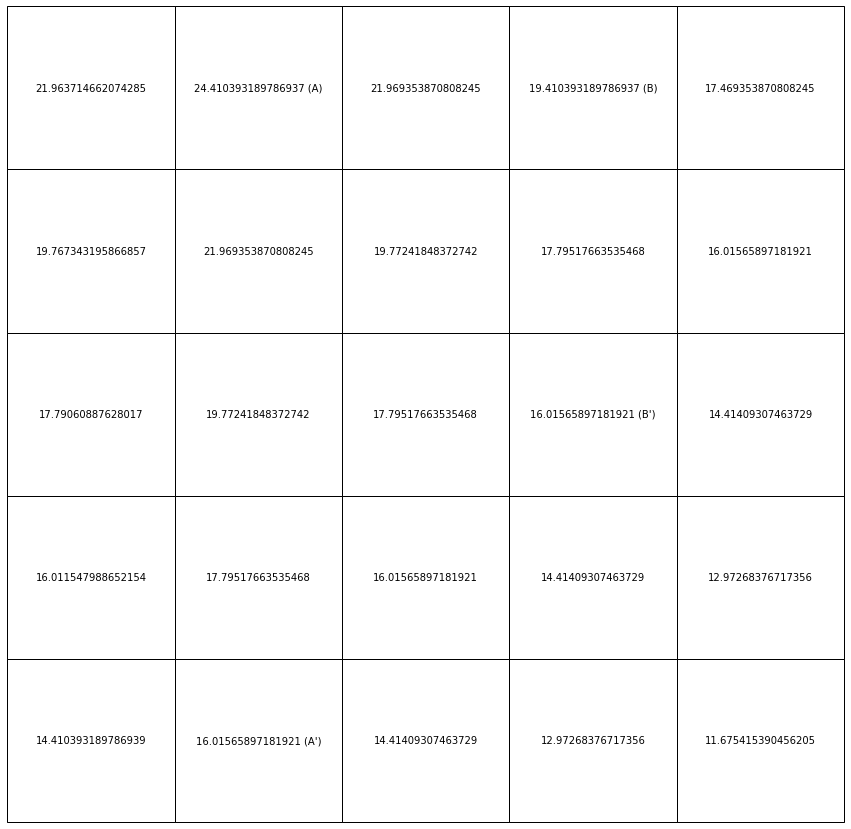

In [18]:
########
# Plot #
########
fig, ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
tb = Table(ax)

# Create cells in table/grid
for (i, j), value in V.items():
    
    # convert to string
    value = str(value)

    # State A  
    if (i, j) == (0, 1):
        
        # state A label
        value = value + " (A)"
    
    # State A'
    if (i, j) == (4, 1):
        
        # State A' label
        value = value + " (A')"
        
    # State B
    if (i, j) == (0, 3):
        
        # State B label
        value = value + " (B)"
        
    # State B'
    if (i, j) == (2, 3):
        
        # State B' label
        value = value + " (B')"
    
    # Create cell
    tb.add_cell(i, j, 1/5, 1/5, text=value,
            loc='center', facecolor='white')

# Create the table
ax.add_table(tb)